# generating figure 1
Tim Tyree<br>
9.22.2021

In [1]:
from lib.my_initialization import *
from lib import *
# from lib.measure.unwrap_and_smooth_cu import *
# from lib.rapids_func import *
# .routines.unwrap_and_smooth_trajectories_cu import *

import itertools
import dask_cudf
from lib.rapids_func import *
get_DT_cu

#magic    
%autocall 1
%load_ext autoreload
%autoreload 2

import cupy as cp, cudf, numba.cuda as cuda
import rmm
# Switch to RMM allocator
cp.cuda.set_allocator(rmm.rmm_cupy_allocator)

Automatic calling is: Smart


# dev

In [8]:
##########################
# Perform Averaging
##########################
tavg1=0
tavg2=14#todo 0
#one token trajectory file for the fenton karma model and the luo-rudy model
input_fn_lst=[
# c='C0'
# # # # #token FK at DT=0.4
"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.2_traj_sr_400_mem_0.csv",
# c='C1'
# #tokenLR at DT=0.5
"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic002.11_traj_sr_600_mem_0.csv",   
]

kwargs_full=dict(
        max_dtmax_thresh = 0,      #ms
        max_Rfinal_thresh = 0.2,   #cm
        min_duration_thresh = 15,  #ms
        npartitions=None,
        width=200,
        height=200,
        ds=5,
        use_drop_shorter_than=False,
        drop_shorter_than=40, #ms
        tmin=100., #ms
        pid_col='particle',
        t_col='t',
        npartitions2=1,
        printing=True)
# min_duration_thresh=1
# pid_col='particle'
# kwargs_full=dict(
#         max_dtmax_thresh = 0,      #ms
#         max_Rfinal_thresh = .2,   #cm  #max range at time of annihilation to be considered an annihilation
#         min_duration_thresh = float(min_duration_thresh),  #ms
#         npartitions=None,
#         width=200,
#         height=200,
#         ds=5,
#         use_drop_shorter_than=False,
#         drop_shorter_than=0, #ms
#         tmin=100., #ms
#         pid_col=pid_col,
#         t_col='t',
#         npartitions2=1,
#         printing=True)

save_dir_lst2_lst=[]
for input_fn in input_fn_lst:
    df = pd.read_csv(input_fn)
    DT = np.around(get_DT(df, pid_col=pid_col), 7)
    print(f"DT={DT} ms")
    retval = routine_postprocess_trajectory_folder(
        input_fn,
        DT,
        tavg1=tavg1,
        tavg2=tavg2,
        **kwargs_full)
    save_dir_lst, save_dir_lst2 = retval
    save_dir_lst2_lst.append(save_dir_lst2)

saving=True
if saving:
    #save data to cache
    #FK at 0.4ms
    save_folder='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results'
    data_dir_fk=f'{save_folder}/annihilation_data_fk_tavg1_{tavg1:.1f}_tavg2_{tavg2:.2f}_min_duration_thresh_{min_duration_thresh}.csv'
    df_fk=dask_cudf.read_csv(save_dir_lst2_lst[0]).compute()
    df_fk.to_csv(data_dir_fk,index=False)
    #LR at 0.5ms
    data_dir_lr=f'{save_folder}/annihilation_data_lr_tavg1_{tavg1:.1f}_tavg2_{tavg2:.2f}_min_duration_thresh_{min_duration_thresh}.csv'
    df_lr=dask_cudf.read_csv(save_dir_lst2_lst[1]).compute()
    df_lr.to_csv(data_dir_lr,index=False)
    print(f"saved to\ndata_dir_fk='{data_dir_fk}'\ndata_dir_lr='{data_dir_lr}'")

DT=0.4 ms
running return_moving_average_of_pbc_trajectories_and_save on 648 files...
the run time was 0.44 minutes.
the number of successfully smoothed trajectory files was 324
the run time was 2.02 minutes.
the number of trajectory files processed to annihilation files was 288
DT=0.5 ms
running return_moving_average_of_pbc_trajectories_and_save on 159 files...
the run time was 0.20 minutes.
the number of successfully smoothed trajectory files was 159
the run time was 469.61 minutes.
the number of trajectory files processed to annihilation files was 108
saved to
data_dir_fk='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_fk_tavg1_0.0_tavg2_14.00_min_duration_thresh_1.csv'
data_dir_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_lr_tavg1_0.0_tavg2_14.00_min_duration_thresh_1.csv'


In [9]:
beep(3)



0

# TODO: plot the kdeplot of the mean squared distances versus the minimum lifetimes for the luo-rudy model

In [41]:
# data_dir_fk='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_fk_tavg1_0.0_tavg2_14.00.csv'
# df=pd.read_csv(data_dir_fk)
data_dir_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_lr_tavg1_0.0_tavg2_14.00.csv'
df=pd.read_csv(data_dir_lr)
df.head()

,event_id_int,pid_self,pid_other,index,t,R,index_pairs,index_self,index_other,x_self,y_self,x_other,y_other,R_nosavgol,tdeath
0,1014126000,68,74,0,186.0,1.275421,0,1443,1446,134.080952,25.349498,104.738229,66.108926,1.255569,41.0
1,1014126000,68,74,1,186.5,1.266636,0,1456,1455,133.998502,25.012627,104.590506,66.137120,1.263936,40.5
2,1014126000,68,74,2,187.0,1.259860,0,1462,1467,134.039986,25.133593,104.564511,66.135175,1.262422,40.0
3,1014126000,68,74,3,187.5,1.254901,0,1471,1472,134.080449,25.225738,104.194274,66.067583,1.265217,39.5
4,1014126000,68,74,4,188.0,1.251562,0,1481,1485,134.274329,25.570294,103.919121,66.037570,1.264674,39.0


In [42]:
R_col='R'
R_col='R_nosavgol'
t_col='t'

minimum_lifetime_lst=[]
RBarSquared_lst=[]
groups=df.groupby(by=['event_id_int','pid_self','pid_other'])
for (event_id_int,pid_self,pid_other),g in groups:
    #compute observables of interest
    minimum_lifetime=g[t_col].max()-g[t_col].min() # ms max_min_time
    RBarSquared=(g[R_col]**2).mean()
    #record
    minimum_lifetime_lst.append(minimum_lifetime)
    RBarSquared_lst.append(RBarSquared)
x_values=np.array(minimum_lifetime_lst)
y_values=np.array(RBarSquared_lst)

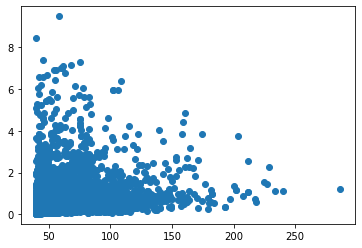

In [43]:
plt.scatter(x_values,y_values)

In [44]:
np.random.seed(42)
#bootstrap average values
num_samples=x_values.shape[0]
xBar=np.mean(x_values)
yBar=np.mean(y_values)
Delta_xBar=np.mean(x_values)
Delta_xBar,p_normal_xBar=bootstrap_95CI_Delta_mean(x_values,num_samples=1000)
Delta_yBar,p_normal_yBar=bootstrap_95CI_Delta_mean(y_values,num_samples=1000)
print(f"bootstrapped average for the full model (num_samples={num_samples}):")
# print(f"xBar: {xBar:.4f} +/-  {Delta_xBar:.4f} (p={p_normal_xBar:.4f})")
# print(f"yBar: {yBar:.4f} +/-  {Delta_yBar:.4f} (p={p_normal_yBar:.4f})")
print(f"mean minimum lifetime: {xBar:.4f} +/-  {Delta_xBar:.4f} ms (p={p_normal_xBar:.4f})")
print(f"mean squared distance: {yBar:.4f} +/-  {Delta_yBar:.4f} cm^2 (p={p_normal_yBar:.4f})")

bootstrapped average for the full model (num_samples=5181):
mean minimum lifetime: 61.9093 +/-  0.6637 ms (p=0.2573)
mean squared distance: 0.7049 +/-  0.0236 cm^2 (p=0.7381)


In [46]:
#TODO: plot a kde for these xy values
df_xy=pd.DataFrame({'x':x_values,'y':y_values,})

In [54]:
kwargs_plot=dict(data=df_xy, x="x", y="y",xlim=[0,150],ylim=[0,2])

In [55]:
# "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" 

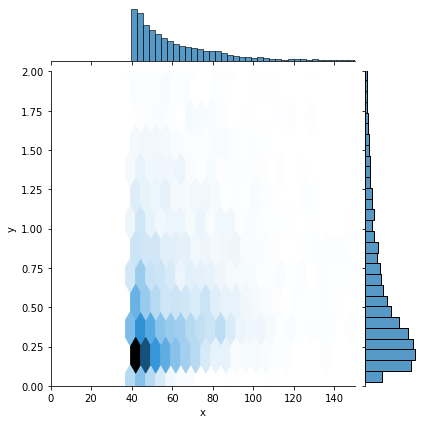

In [56]:
sns.jointplot(kind="hex",**kwargs_plot)

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")


In [ ]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=geyser, x="waiting", y="duration")

In [ ]:
sns.kdeplot(
    data=geyser, x="waiting", y="duration", hue="kind", fill=True,
)

In [ ]:
sns.kdeplot(
    data=geyser, x="waiting", y="duration",
    fill=True, thresh=0, levels=100, cmap="mako",
)

# (deprecated)

In [10]:
#conda activate pyenv_ub
from lib import *
import cuml
import cupy
import cudf
import tensorflow
import xgboost as xgb
import bokeh
import plotly
import seaborn as sns

In [21]:
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [27]:
#TODO: load a csv file with annihilating trajectories from the Luo-Rudy model
input_fn_full='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40/trajectories/ic001.21_traj_sr_600_mem_0.csv'
#TODO: load a csv file with annihilating trajectories from the particle model
input_fn_particle='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv'
df_full=cudf.read_csv(input_fn_full)
df_particle=cudf.read_csv(input_fn_particle)
df=df_full.copy()
df.head()

In [ ]:
#TODO: compute annihilation events for a particle from the Luo-Rudy model
kwargs={
    'input_fn_lst':file_name_list,
    'L':width,
    'DS':ds/width,
    'use_cache_0':True,
    'use_cache_1':True,
    'npartitions':npartitions,
    'sr':3*width,
    'mem':0,
    'trial_folder_name':trial_folder_name,
    'ic_suite_fn':ic_suite_fn
}
DS,width,trial_folder_name

In [29]:
input_fn=input_fn_full
ds=5
width=200
pid_col='particle'
t_col='t'
height=width
df=pd.read_csv(input_fn);print(input_fn)
DT=np.around(get_DT(df,pid_col=pid_col),5);print(f"the time resolution is {DT} ms.")
DS=ds/width
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40/trajectories/ic001.21_traj_sr_600_mem_0.csv
the time resolution is 0.025 ms.


In [30]:
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']
print(f"termination time was {df[t_col].max():.2f} ms")

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

termination time was 6802.80 ms
printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40:
count    82798.000000
mean         1.146551
std          2.425658
min         -0.000000
25%          0.175000
50%          0.375000
75%          0.900000
max         71.500000
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [32]:
#full model lr (and fk)
min_duration=50#ms
min_range   =.5#cm
filter_beginning=True #this does nothing rn...
use_min_duration=False
use_grad_voltage=True
range_threshold=.1 #cm #filter any deaths occurring at ranges exceeding range_threshold
tmin=100#ms
max_dur=500#149#ms#150# #consider no more than the last max_dur milliseconds of either trajectory

# # #particle model
# min_duration=40  #20. #ms # a pair of particles is considered if their lifetime is at least min_range
# min_range   =0  #cm  # a pair of particles is considered if their max distance is at least min_range
# filter_beginning=True
# use_min_duration=True
# use_grad_voltage=False
# range_threshold=10 #cm #filter any deaths occurring at ranges exceeding range_threshold
# round_t_to_n_digits=5
# tmin=0.  #filter all times earlier than tmin? i think so?
# max_dur=0.#ms


# filter_beginning=False
# use_min_duration=False

npartitions=os.cpu_count()-2
# npartitions=10#1

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
#     'DT':DT,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
    'npartitions':npartitions,
    'filter_beginning':filter_beginning,
    'use_grad_voltage':use_grad_voltage,
    'use_min_duration':use_min_duration,
    'range_threshold':range_threshold,
    'round_t_to_n_digits':round_t_to_n_digits,
    'tmin':tmin,
    'pid_col':pid_col,
    't_col':t_col,
    'max_dur':max_dur,
    'folder_out_name':f'annihilations_mindur_{min_duration}_maxdur_{max_dur}_minrange_{min_range}_rangethresh_{range_threshold}'
}#'folder_out_name':f'annihilations
kwargs

{'width': 200,
 'height': 200,
 'ds': 5,
 'printing': False,
 'min_range': 0.5,
 'min_duration': 50,
 'npartitions': 10,
 'filter_beginning': True,
 'use_grad_voltage': True,
 'use_min_duration': False,
 'range_threshold': 0.1,
 'round_t_to_n_digits': 5,
 'tmin': 100,
 'pid_col': 'particle',
 't_col': 't',
 'max_dur': 500,
 'folder_out_name': 'annihilations_mindur_50_maxdur_500_minrange_0.5_rangethresh_0.1'}

In [33]:
routine_traj_to_annihilation=get_routine_traj_to_annihilation(**kwargs)
def routine(input_fn):
    return routine_traj_to_annihilation(input_fn)

In [34]:
output_fn=routine(input_fn)
print(f"annihilations saved to\n{output_fn}")
annhil_fn_full=output_fn

annihilations saved to
	 /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40/trajectories/ic001.21_traj_sr_600_mem_0.csv


In [45]:
annihil_fn_full='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40/trajectories/ic001.21_traj_sr_600_mem_0.csv'
annihil_fn_full='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_50_maxdur_149_minrange_0.5_rangethresh_0.1.csv'

In [46]:
df_full_annihil=cudf.read_csv(annihil_fn_full)
df=df_full_annihil.copy()
df.head()

,pid,pid_deathmate,tdeath,r,theta,phi1,phi2,phi_sum,phi_diff,event_id
0,1640,2023,47.550,0.756487,2.814156,-0.019985,-0.152492,-0.172477,0.132506,1.004126e+09
1,1640,2023,47.525,0.756635,2.562011,-0.015335,-0.171452,-0.186788,0.156117,1.004126e+09
2,1640,2023,47.500,0.756731,2.030216,-0.010485,-0.190764,-0.201249,0.180278,1.004126e+09
3,1640,2023,47.475,0.756783,1.335250,-0.005437,-0.210485,-0.215922,0.205048,1.004126e+09
4,1640,2023,47.450,0.756800,0.917789,-0.000194,-0.230668,-0.230862,0.230474,1.004126e+09


In [ ]:
#TODO: compute annihilation events for a particle from the particle model that is


In [ ]:
#TODO: select a particle from the Luo-Rudy model that is 
# - near the center of the domain, 
# - is long lived, and 
# - has a partner that is reasonably long-lived

In [ ]:
#TODO: compute annihilation events for a particle from the particle model that is
# - is long lived, and 
# - has a partner that is reasonably long-lived


In [22]:
#TODO: visualize an appealing spiral tip trajectory
# - swap out a few trajectories from the Luo-Rudy model and see what is most visually appealing

#TODO: translate scale and rotate the particle annihilation event onto that of the Luo-Rudy model
# - annihilation points must match
# - at least one initial point must match
#TODO: rotate and scale the other particle onto the other start point of the Luo-Rudy model
#TODO: visualize Fig. 1B
# - swap out a few trajectories from the Luo-Rudy model and see what is most visually appealing
# - swap out a few trajectories from the particle model and see what is most visually appealing
#TODO: scale and rotate the other start points to match

#TODO: load the initial conditions texture used by this particle

#TODO: generate a snapshot from the Luo-Rudy model
